<a href="https://colab.research.google.com/github/kleczekr/tolkenizer/blob/master/text_clustering_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import nltk.data
from nltk.tokenize import sent_tokenize
nltk.download('punkt')
from urllib import request

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
url_alice = 'https://www.gutenberg.org/files/11/11-0.txt'
url_moby = 'https://www.gutenberg.org/files/2701/2701-0.txt'
# opening the txt files
response_alice = request.urlopen(url_alice)
response_moby = request.urlopen(url_moby)
# reading the files into raw variables as strings
raw_alice = response_alice.read().decode('utf8')
raw_moby = response_moby.read().decode('utf8')
# Split the raw files into lists of sentences
tokenized_alice = sent_tokenize(raw_alice)
tokenized_moby = sent_tokenize(raw_moby)
# remove the contents
tokenized_alice = tokenized_alice[14:]
tokenized_moby = tokenized_moby[275:]
# join the lists
tokenized_joint = tokenized_alice + tokenized_moby
# split joint list into lists of words
word_split_joint = [sentence.split() for sentence in tokenized_joint]

In [3]:
# pipeline to clean the lists of words (remove uppercase,
# punctuation, words are subsequently stemmed)
import nltk
nltk.download('stopwords')
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

table = str.maketrans('', '', string.punctuation)
stop_words = set(stopwords.words('english'))
porter = PorterStemmer()

def fantabulize(sentence):
  # lowercase
  sentence = [word.lower() for word in sentence]
  # remove punctuation
  sentence = [word.translate(table) for word in sentence]
  # remove nonalphabetic tokens
  sentence = [word for word in sentence if word.isalpha()]
  # remove stopwords
  sentence = [word for word in sentence if not word in stop_words]
  # stem em words
  sentence = [porter.stem(word) for word in sentence]
  # return em sentence
  return sentence

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
# run the fantabulize pipeline on our list of lists of words
count = 0
for sentence in word_split_joint:
  word_split_joint[count] = fantabulize(sentence)
  count += 1

In [5]:
# let's try removing empty lists:
word_split_joint = [element for element in word_split_joint if element != []]

In [6]:
from gensim.models import Word2Vec
model = Word2Vec(word_split_joint, min_count=1)
# summarize the loaded model
print(model)

Word2Vec(vocab=11827, size=100, alpha=0.025)


In [7]:
# summarize vocabulary
words = list(model.wv.vocab)
# print(words)

In [8]:
# retrieve all the vectors from a model, saved in variable X
X = model[model.wv.vocab]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


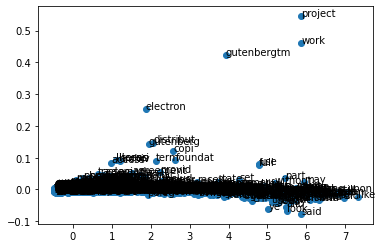

In [9]:
from sklearn.decomposition import PCA
from matplotlib import pyplot
% matplotlib inline

pca = PCA(n_components=2)
result = pca.fit_transform(X)

# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
	pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

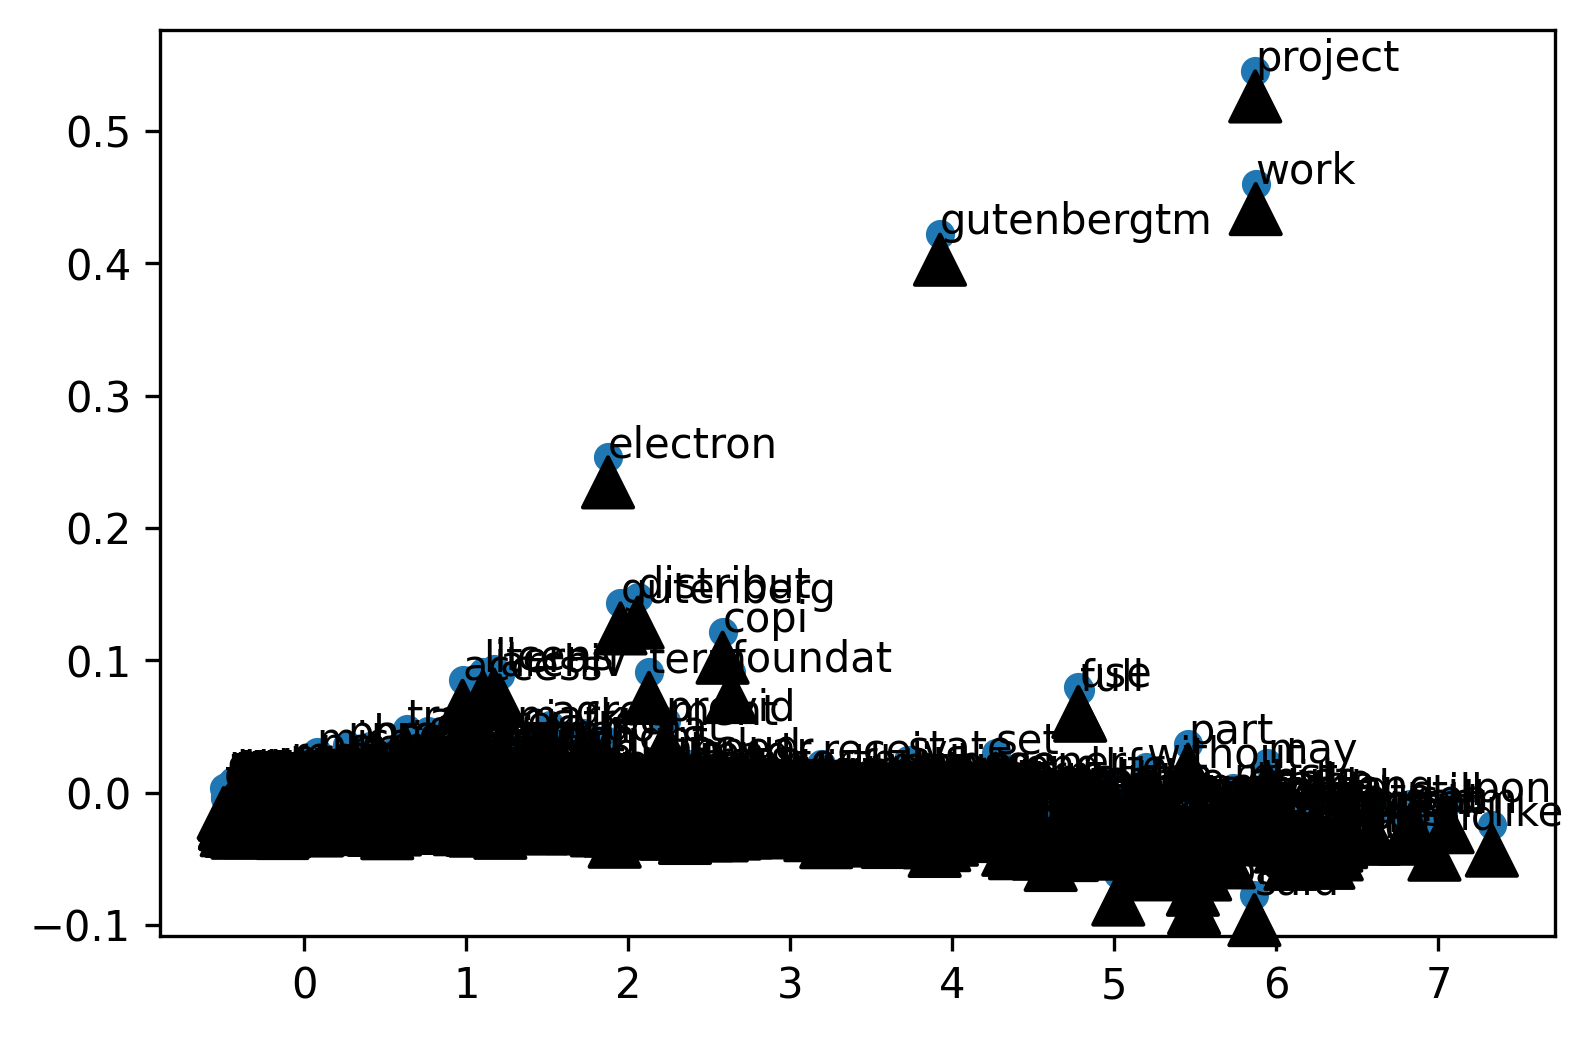

In [10]:
# create a scatter plot of the projection
pyplot.rcParams['figure.dpi'] = 300

pyplot.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
	pyplot.annotate(word, xy=(result[i, 0], result[i, 1]), arrowprops=dict(facecolor='black', shrink=0.05))
pyplot.show()